# Main

### Imports

In [1]:
import pandas as pd

from data_preprocessing.preprocessing import preprocessing

from collections import Counter

### Import data

In [2]:
data = pd.read_csv('../final_data/complete_dataset_12_09_2.csv')

### General preprocessing

In [3]:
data['clean_post'] = data['post'].apply(lambda x: preprocessing(x))

In [4]:
data.head()

,datetime,tweet_id,post,user,set,clean_post
0,2021-05-31 13:02:37+00:00,1399350603969613833,Wat een gezeik; tot eind september mondkapjes....,Persoon2795,covid,Wat een gezeik ; tot eind september mondkapjes...
1,2021-05-31 10:21:26+00:00,1399310042717958149,Waarom zijn mensen bang voor vaccinatie? Het n...,Persoon19344,covid,Waarom zijn mensen bang voor vaccinatie ? Het ...
2,2021-05-30 20:08:25+00:00,1399095371398324226,Ik krijg buikpijn van de steeds terugkerende v...,Persoon14610,covid,Ik krijg buikpijn van de steeds terugkerende v...
3,2021-05-30 17:05:06+00:00,1399049239607578625,Je zou maar #AstraZeneca hebben laten prikken....,Persoon1779,covid,Je zou maar # AstraZeneca hebben laten prikken...
4,2021-05-30 17:03:17+00:00,1399048780729622528,#samenleving #ikdoenietmeermee #nederlands Hal...,Persoon1410,covid,Hallo allemaal . Dit is mijn gedicht over same...


*Remove posts that have fewer than 2 tokens after preprocessing

In [5]:
print(len(data))
data = data[data['clean_post'].notnull()]
len(data)

82349


82261

*Remove duplicate clean posts*

In [6]:
print(len(data))
data = data.drop_duplicates(subset='clean_post', keep="first").reset_index(drop=True)
print(len(data))

82261
78912


In [7]:
data.head()

,datetime,tweet_id,post,user,set,clean_post
0,2021-05-31 13:02:37+00:00,1399350603969613833,Wat een gezeik; tot eind september mondkapjes....,Persoon2795,covid,Wat een gezeik ; tot eind september mondkapjes...
1,2021-05-31 10:21:26+00:00,1399310042717958149,Waarom zijn mensen bang voor vaccinatie? Het n...,Persoon19344,covid,Waarom zijn mensen bang voor vaccinatie ? Het ...
2,2021-05-30 20:08:25+00:00,1399095371398324226,Ik krijg buikpijn van de steeds terugkerende v...,Persoon14610,covid,Ik krijg buikpijn van de steeds terugkerende v...
3,2021-05-30 17:05:06+00:00,1399049239607578625,Je zou maar #AstraZeneca hebben laten prikken....,Persoon1779,covid,Je zou maar # AstraZeneca hebben laten prikken...
4,2021-05-30 17:03:17+00:00,1399048780729622528,#samenleving #ikdoenietmeermee #nederlands Hal...,Persoon1410,covid,Hallo allemaal . Dit is mijn gedicht over same...


In [8]:
preprocessing_show = data.sample(n=3, random_state=52).reset_index(drop=True) 
for p in range(len(preprocessing_show)):
    print(preprocessing_show['post'][p], '\n', preprocessing_show['clean_post'][p], '\n\n')

@gebruiker11112 En zo is het. Maar even wat anders: is @gebruiker3331 al bijna klaar voor het Minister-Presidentschap? En zo ja, bereid dit zonder het #CDA te doen? Antwoord zou fijn en hoopgevend zijn, wat dat ook moge zijn... #TeamOmtzigt #RutteDoctrine #ToeslagenAffaire #OngekendOnrecht 
 En zo is het . Maar even wat anders : is @ gebruiker3331 al bijna klaar voor het Minister - Presidentschap ? En zo ja , bereid dit zonder het # CDA te doen ? Antwoord zou fijn en hoopgevend zijn , wat dat ook moge zijn . . .  


@gebruiker2109 #ikdoenietmeermee met samen.... 
 met samen . . . .  


Ja! #rutgerbergman in #DitIsM noemt zo terecht @gebruiker9674 Mijn ‘held’ in het aankaarten en benoemen van wat gaande is in de maatschappij, relatie tussen politiek-beleid-volk. Genegeerd - vaak, ook in het hele prille begin #toeslagenaffaire Mis hem nog steeds.. 
 Ja ! in # DitIsM noemt zo terecht @ gebruiker9674 Mijn held in het aankaarten en benoemen van wat gaande is in de maatschappij , relatie tus

In [9]:
covid = data[data['set'] == 'covid'].reset_index(drop=True)
affair = data[data['set'] == 'affair'].reset_index(drop=True)

*Find cut-off for tweet length*

In [10]:
sequence_lenghts_covid = {}
for post in covid['clean_post']:
    if len(post.split()) not in sequence_lenghts_covid.keys():
        sequence_lenghts_covid[len(post.split())] = 1
    else:
        sequence_lenghts_covid[len(post.split())] = sequence_lenghts_covid[len(post.split())]+1
        
sequence_lenghts_affair = {}
for post in affair['clean_post']:
    if len(post.split()) not in sequence_lenghts_affair.keys():
        sequence_lenghts_affair[len(post.split())] = 1
    else:
        sequence_lenghts_affair[len(post.split())] = sequence_lenghts_affair[len(post.split())]+1

<BarContainer object of 72 artists>

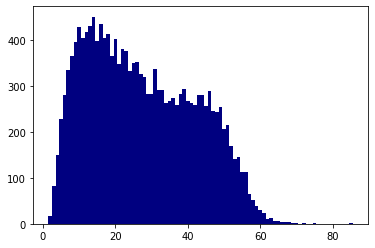

In [11]:
import matplotlib.pyplot as plt
plt.bar(sequence_lenghts_covid.keys(), sequence_lenghts_covid.values(), width=1.0, color='navy')

<BarContainer object of 75 artists>

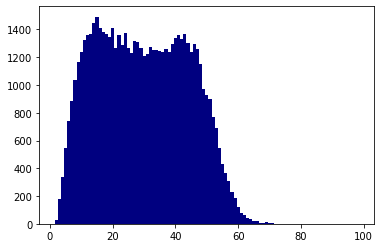

In [12]:
import matplotlib.pyplot as plt
plt.bar(sequence_lenghts_affair.keys(), sequence_lenghts_affair.values(), width=1.0, color='navy')

In [13]:
def shorter(post):
    if len(post.split()) <= 40:
        return True
    else: return False

In [14]:
covid['short'] = covid['clean_post'].apply(lambda x: shorter(x))
affair['short'] = affair['clean_post'].apply(lambda x: shorter(x))

In [15]:
short_covid = covid[covid['short'] == True]
short_affair = affair[affair['short'] == True]

In [16]:
len(short_covid), len(short_affair)

(12561, 45575)

In [17]:
short_covid.to_csv('short_covid.csv', index=False)
short_affair.to_csv('short_affair.csv', index=False)

In [18]:
from sklearn.utils import shuffle
short_covid_sample = short_covid.sample(1400, random_state=16)
short_affair_sample = short_affair.sample(45500, random_state=16)
initial_classifier_sample = shuffle(pd.concat([short_covid_sample, short_affair_sample], axis=0)).reset_index(drop=True)
print(len(initial_classifier_sample))
initial_classifier_sample.head()

46900


,datetime,tweet_id,post,user,set,clean_post,short
0,2021-01-23 21:04:33+00:00,1353086242175545347,Waarom vonden de slachtoffers vd #toeslagenaff...,Persoon805,affair,Waarom vonden de slachtoffers vd # toeslagenaf...,True
1,2020-12-18 22:11:02+00:00,1340057009270435842,@gebruiker12402 Ongelooflijk. #toeslagenaffair...,Persoon18052,affair,"Ongelooflijk . Ssssttt . Geen tijd nu , we gaa...",True
2,2020-12-30 20:40:23+00:00,1344382849869377544,Nu is duidelijk: rechter hoort niet bij de Raa...,Persoon12656,affair,Nu is duidelijk : rechter hoort niet bij de Ra...,True
3,2020-11-23 13:08:40+00:00,1330860819559616522,Heeft u een overdracht gehad van Weekers? #toe...,Persoon1300,affair,Heeft u een overdracht gehad van Weekers ?,True
4,2020-12-20 14:17:31+00:00,1340662619196313606,@gebruiker3331 @gebruiker917 @gebruiker2283 Wo...,Persoon3605,affair,Worden ! Daarna hoop ik dat het andere onrecht...,True


In [19]:
initial_classifier_sample = initial_classifier_sample.drop(['datetime', 'tweet_id', 'post', 'user', 'short'], axis=1)
initial_classifier_sample.head()

,set,clean_post
0,affair,Waarom vonden de slachtoffers vd # toeslagenaf...
1,affair,"Ongelooflijk . Ssssttt . Geen tijd nu , we gaa..."
2,affair,Nu is duidelijk : rechter hoort niet bij de Ra...
3,affair,Heeft u een overdracht gehad van Weekers ?
4,affair,Worden ! Daarna hoop ik dat het andere onrecht...


In [30]:
initial_classifier_sample.to_csv('active_learning_data_to_test_imbalanced.csv', index=False)

In [22]:
X = initial_classifier_sample.drop(['set'], axis=1)
Y = initial_classifier_sample.drop(['clean_post'], axis=1)

In [23]:
X.to_csv('active_learning_X_to_test.csv', index=False)
Y.to_csv('active_learning_Y_to_test.csv', index=False)

*check vocab sizes for data inspection*

In [65]:
covid_words = [word for post in short_covid['clean_post'] for word in post.split()]
affair_words = [word for post in short_affair['clean_post'] for word in post.split()]

In [66]:
vocab_covid = len(set(covid_words))
vocab_affair = len(set(affair_words))
vocab_covid, vocab_affair

(21874, 45404)

***Define vocab size, sequence length, and train-test split for generation task***

In [67]:
word_freq_covid = Counter(covid_words)

In [68]:
len(word_freq_covid)

21874

In [124]:
max(word_freq_covid.values())

17105

(array([2.1737e+04, 6.4000e+01, 1.8000e+01, 1.3000e+01, 7.0000e+00,
        4.0000e+00, 6.0000e+00, 4.0000e+00, 3.0000e+00, 0.0000e+00,
        3.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

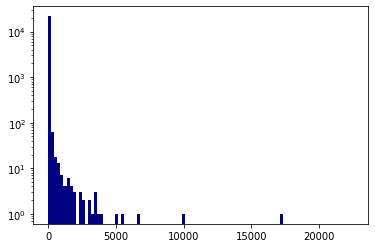

In [131]:
plt.hist(word_freq_covid.values(), bins=100, range=(0,22500), color='navy', log=True)

In [69]:
unfrequent_covid = {key:value for (key, value) in word_freq_covid.items() if value < 3}
len(unfrequent_covid)

15747

In [70]:
covid_without_unfrequent_words = [post for post in short_covid['clean_post'] if len(set([word for word in post.split()]).intersection(set(unfrequent_covid.keys()))) == 0]

In [71]:
len(covid_without_unfrequent_words), len(covid), len(short_covid)

(4101, 16294, 12561)

In [72]:
# covid_words_final = [word for post in covid_without_unfrequent_words for word in post.split()]

In [77]:
gen_covid = pd.DataFrame(covid_without_unfrequent_words, columns=['text'])

In [78]:
gen_covid.head()

,text
0,Dit is de echte # viruswaarheid
1,ikdoenietmeermee is nr . 10 trending hashtag i...
2,Moet niet gekker worden # ikdoenietmeermee
3,niet # ikdoenietmeermee wanneer ik de kans kri...
4,Die is wel wijzer . Net als jij en ik # ikweiger


In [103]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(gen_covid, test_size=0.2, random_state=16)

In [104]:
len(train), len(test)

(3280, 821)

In [105]:
test, val = train_test_split(test, test_size=0.5, random_state=16)

In [106]:
train = train.reset_index(drop=True)
val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

In [107]:
len(train), len(test), len(val)

(3280, 410, 411)

In [132]:
covid_small_vocab = list(set([word for post in gen_covid['text'] for word in post.split()]))
train_vocab = list(set([word for post in train['text'] for word in post.split()]))
val_vocab = list(set([word for post in val['text'] for word in post.split()]))
test_vocab = list(set([word for post in test['text'] for word in post.split()]))

In [133]:
len(covid_small_vocab), len(train_vocab), len(test_vocab), len(val_vocab)

(4664, 4301, 1490, 1623)

**ID all tokens**

In [111]:
covid_train_word_indices = {word:i for (i, word) in list(enumerate(train_vocab))}
covid_train_word_indices[' '] = int(len(train_vocab))

In [112]:
def replace_words_by_ids(post):
    ided_post = []
    for word in post.split():
        ided_post.append(covid_train_word_indices[word])
    while len(ided_post) < 40:
        ided_post.append(covid_train_word_indices[' '])
    ided_post = ' '.join((str(v) for v in ided_post))
    return ided_post

In [113]:
train['ids'] = list(map(lambda x: replace_words_by_ids(x), train['text']))

In [116]:
train_vocab.append(' ')

In [117]:
with open("covid_gen_train_vocab.txt", "w") as outfile:
    outfile.write("\n".join(train_vocab))

In [118]:
with open("covid_gen_train_ids.txt", "w") as outfile:
    outfile.write("\n".join(train['ids']))

In [119]:
with open("covid_gen_train_text.txt", "w") as outfile:
    outfile.write("\n".join(train['text']))

In [120]:
with open("covid_gen_val_text.txt", "w") as outfile:
    outfile.write("\n".join(val['text']))

In [121]:
with open("covid_gen_test_text.txt", "w") as outfile:
    outfile.write("\n".join(test['text']))